In [256]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [65]:
data = pd.read_csv("C:\\Users\\ssriva\\Desktop\\Great_Lakes\\Projects\\Unsupervised Learning\\vehicle-2.csv")
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [67]:
data.shape

(846, 19)

In [68]:
data.isnull().sum()[data.isnull().sum()>0]

circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

<b>We do have missing values in the above columns. Therefore we are transforming the dataframe into a pure numerical dataframe and imputing the missing values using 'mean' strategy.</b>

In [254]:
numeric_raw_Data = data.iloc[:,0:18].copy()
col = numeric_raw_Data.columns
y = data['class']

In [70]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
numeric_raw_Data = pd.DataFrame(imputer.fit_transform(np.array(numeric_raw_Data)), columns=col)

In [71]:
numeric_raw_Data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                 103.0                     52.0          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0          197.0  
1             189.0          199.0  
2             188.0          196.0  
3             199.0          207.0  
4             180.0          183.0

In [72]:
numeric_raw_Data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

<h1>Univariate Analysis</h1>

<h3>compactness</h3>

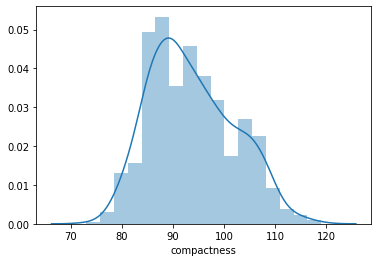

In [73]:
sns.distplot(numeric_raw_Data['compactness'])

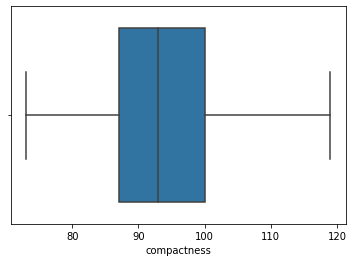

In [74]:
sns.boxplot(numeric_raw_Data['compactness'])

<h3>circularity</h3>

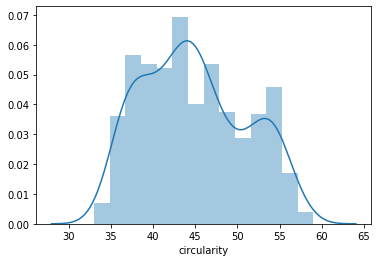

In [75]:
sns.distplot(numeric_raw_Data['circularity'])

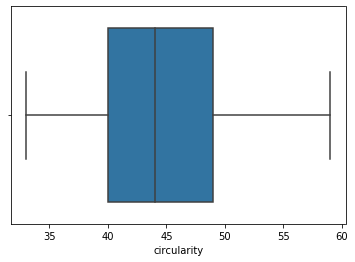

In [76]:
sns.boxplot(numeric_raw_Data['circularity'])

<h3>distance_circularity</h3>

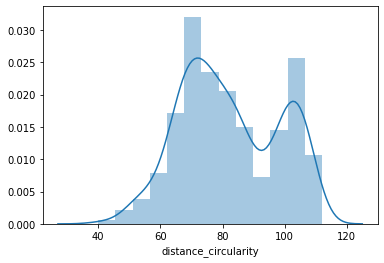

In [77]:
sns.distplot(numeric_raw_Data['distance_circularity'])

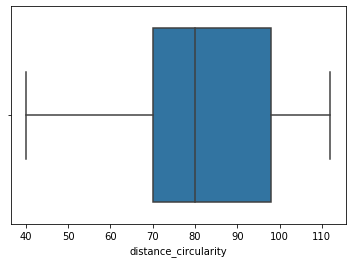

In [78]:
sns.boxplot(numeric_raw_Data['distance_circularity'])

<h3>radius_ratio </h3>

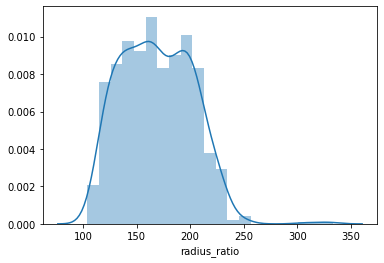

In [79]:
sns.distplot(numeric_raw_Data['radius_ratio'])

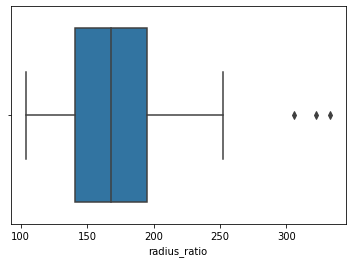

In [80]:
sns.boxplot(numeric_raw_Data['radius_ratio'])

<h3>pr.axis_aspect_ratio</h3>

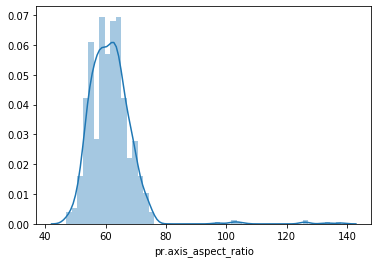

In [81]:
sns.distplot(numeric_raw_Data['pr.axis_aspect_ratio'])

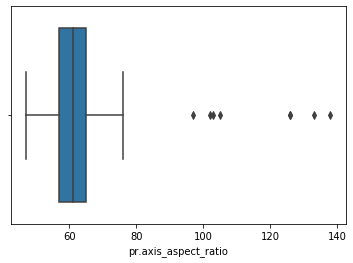

In [82]:
sns.boxplot(numeric_raw_Data['pr.axis_aspect_ratio'])

<h3>max.length_aspect_ratio</h3>

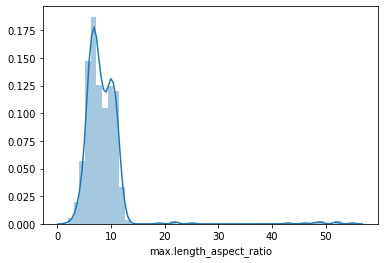

In [83]:
sns.distplot(numeric_raw_Data['max.length_aspect_ratio'])

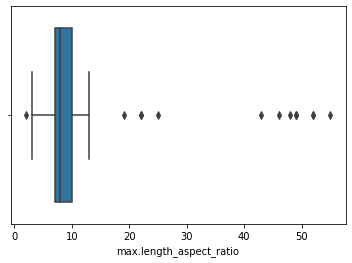

In [84]:
sns.boxplot(numeric_raw_Data['max.length_aspect_ratio'])

<h3>scatter_ratio</h3>

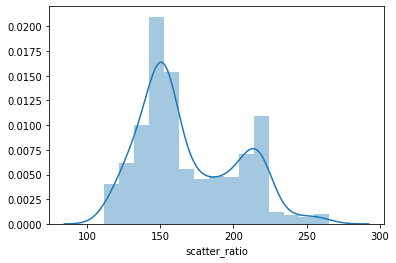

In [85]:
sns.distplot(numeric_raw_Data['scatter_ratio'])

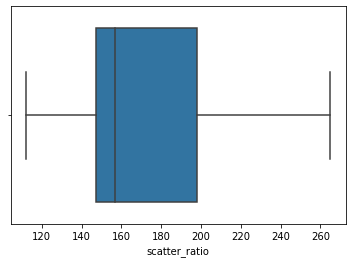

In [86]:
sns.boxplot(numeric_raw_Data['scatter_ratio'])

<h3>elongatedness</h3>

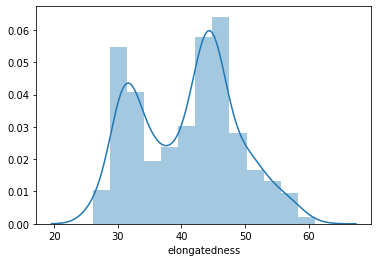

In [87]:
sns.distplot(numeric_raw_Data['elongatedness'])

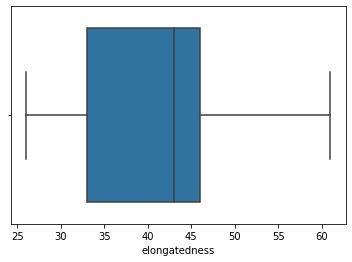

In [88]:
sns.boxplot(numeric_raw_Data['elongatedness'])

<h3>compactness</h3>

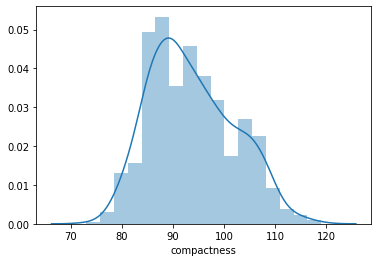

In [89]:
sns.distplot(numeric_raw_Data['compactness'])

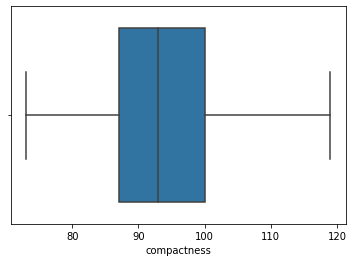

In [90]:
sns.boxplot(numeric_raw_Data['compactness'])

<h3>compactness</h3>

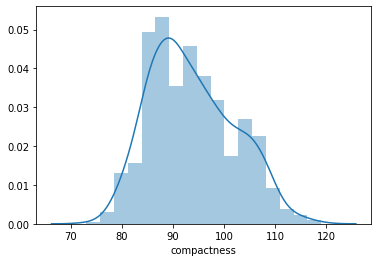

In [91]:
sns.distplot(numeric_raw_Data['compactness'])

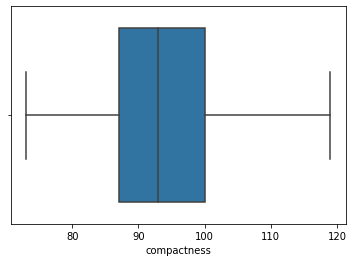

In [92]:
sns.boxplot(numeric_raw_Data['compactness'])

<h3>pr.axis_rectangularity</h3>

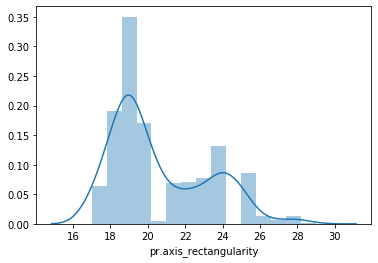

In [93]:
sns.distplot(numeric_raw_Data['pr.axis_rectangularity'])

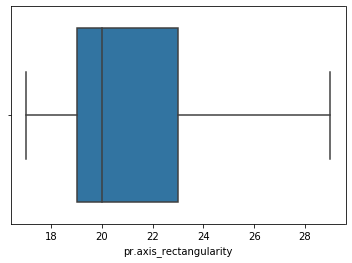

In [94]:
sns.boxplot(numeric_raw_Data['pr.axis_rectangularity'])

<h3>max.length_rectangularity</h3>

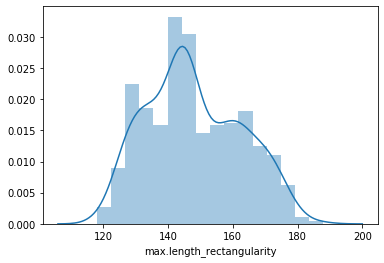

In [95]:
sns.distplot(numeric_raw_Data['max.length_rectangularity'])

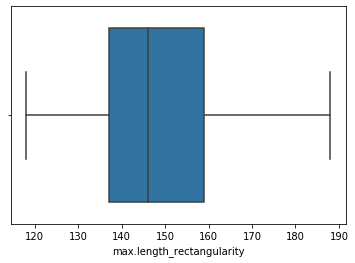

In [96]:
sns.boxplot(numeric_raw_Data['max.length_rectangularity'])

<h3>scaled_variance</h3>

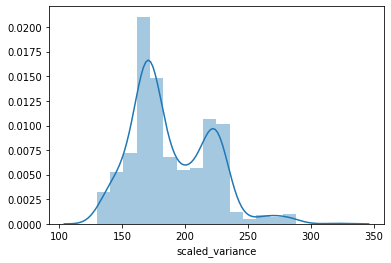

In [97]:
sns.distplot(numeric_raw_Data['scaled_variance'])

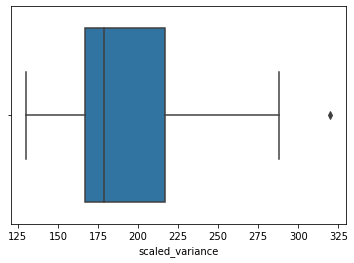

In [98]:
sns.boxplot(numeric_raw_Data['scaled_variance'])

<h3>scaled_variance.1</h3>

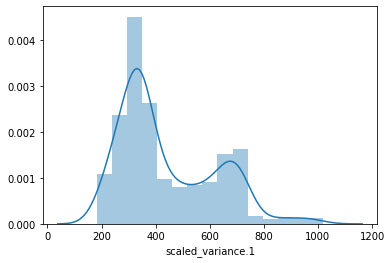

In [99]:
sns.distplot(numeric_raw_Data['scaled_variance.1'])

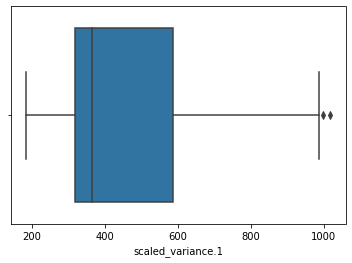

In [100]:
sns.boxplot(numeric_raw_Data['scaled_variance.1'])

<h3>scaled_radius_of_gyration</h3>

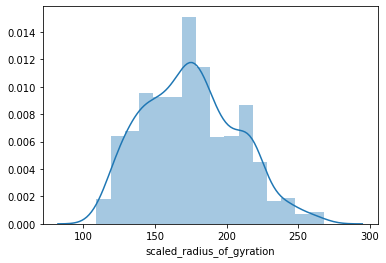

In [101]:
sns.distplot(numeric_raw_Data['scaled_radius_of_gyration'])

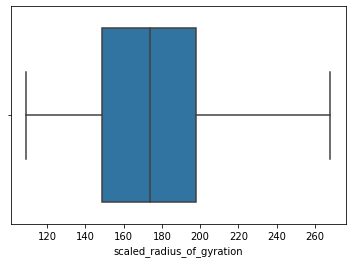

In [102]:
sns.boxplot(numeric_raw_Data['scaled_radius_of_gyration'])

<h3>scaled_radius_of_gyration.1</h3>

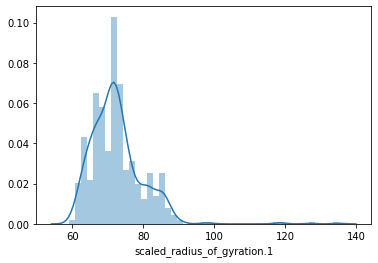

In [103]:
sns.distplot(numeric_raw_Data['scaled_radius_of_gyration.1'])

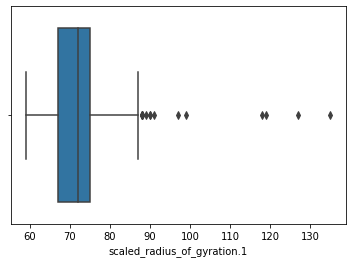

In [104]:
sns.boxplot(numeric_raw_Data['scaled_radius_of_gyration.1'])

<h3>skewness_about</h3>

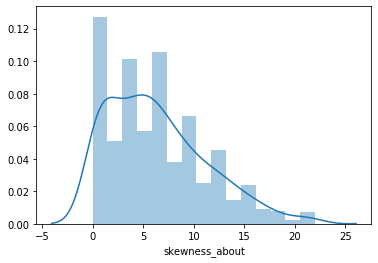

In [105]:
sns.distplot(numeric_raw_Data['skewness_about'])

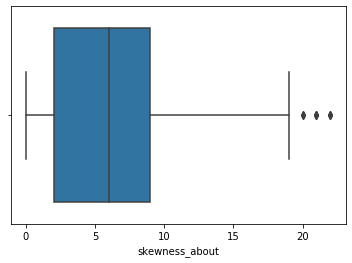

In [106]:
sns.boxplot(numeric_raw_Data['skewness_about'])

<h3>skewness_about.1</h3>

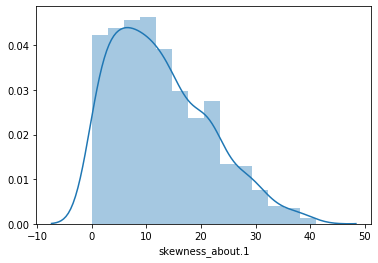

In [107]:
sns.distplot(numeric_raw_Data['skewness_about.1'])

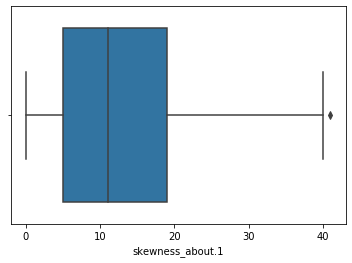

In [108]:
sns.boxplot(numeric_raw_Data['skewness_about.1'])

<h3>skewness_about.2</h3>

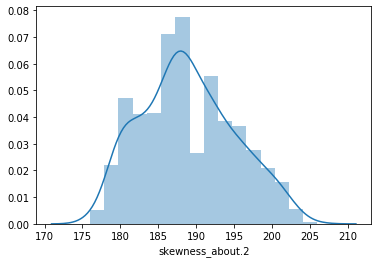

In [109]:
sns.distplot(numeric_raw_Data['skewness_about.2'])

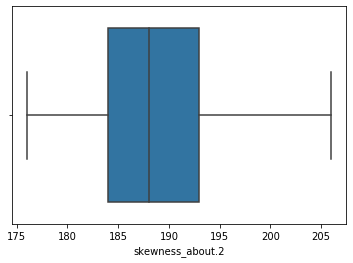

In [110]:
sns.boxplot(numeric_raw_Data['skewness_about.2'])

<h3>hollows_ratio</h3>

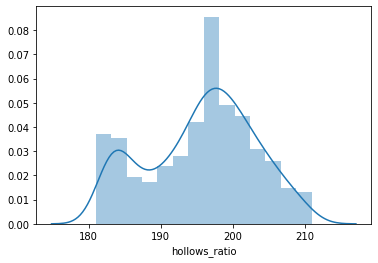

In [111]:
sns.distplot(numeric_raw_Data['hollows_ratio'])

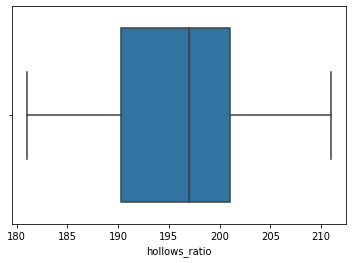

In [112]:
sns.boxplot(numeric_raw_Data['hollows_ratio'])

<h1>Fixing Outliers</h1>

In [194]:
describe_df = numeric_raw_Data.describe().transpose()

In [195]:
describe_df['cap_value_min'] = describe_df.loc[:,'mean']-2*describe_df.loc[:,'std']
describe_df['cap_value_max'] = describe_df.loc[:,'mean']+2*describe_df.loc[:,'std']

In [196]:
describe_df = describe_df.transpose()
describe_df

compactness  circularity  distance_circularity  radius_ratio  \
count           846.000000   846.000000            846.000000    846.000000   
mean             93.678487    44.828775             82.110451    168.888095   
std               8.234474     6.133943             15.740902     33.400979   
min              73.000000    33.000000             40.000000    104.000000   
25%              87.000000    40.000000             70.000000    141.000000   
50%              93.000000    44.000000             80.000000    168.000000   
75%             100.000000    49.000000             98.000000    195.000000   
max             119.000000    59.000000            112.000000    333.000000   
cap_value_min    77.209538    32.560889             50.628646    102.086137   
cap_value_max   110.147436    57.096662            113.592256    235.690054   

               pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count                    846.000000               846.000000     846.000000   
mean                      61.678910                 8.567376     168.901775   
std                        7.882119                 4.601217      33.195188   
min                       47.000000                 2.000000     112.000000   
25%                       57.000000                 7.000000     147.000000   
50%                       61.000000                 8.000000     157.000000   
75%                       65.000000                10.000000     198.000000   
max                      138.000000                55.000000     265.000000   
cap_value_min             45.914673                -0.635057     102.511398   
cap_value_max             77.443147                17.769809     235.292152   

               elongatedness  pr.axis_rectangularity  \
count             846.000000              846.000000   
mean               40.933728               20.582444   
std                 7.811559                2.588326   
min                26.000000               17.000000   
25%                33.000000               19.000000   
50%                43.000000               20.000000   
75%                46.000000               23.000000   
max                61.000000               29.000000   
cap_value_min      25.310609               15.405791   
cap_value_max      56.556847               25.759096   

               max.length_rectangularity  scaled_variance  scaled_variance.1  \
count                         846.000000       846.000000         846.000000   
mean                          147.998818       188.631079         439.494076   
std                            14.515652        31.355195         176.457706   
min                           118.000000       130.000000         184.000000   
25%                           137.000000       167.000000         318.250000   
50%                           146.000000       179.000000         364.000000   
75%                           159.000000       217.000000         586.750000   
max                           188.000000       320.000000        1018.000000   
cap_value_min                 118.967515       125.920690          86.578665   
cap_value_max                 177.030121       251.341469         792.409487   

               scaled_radius_of_gyration  scaled_radius_of_gyration.1  \
count                         846.000000                   846.000000   
mean                          174.709716                    72.447743   
std                            32.546223                     7.468450   
min                           109.000000                    59.000000   
25%                           149.000000                    67.000000   
50%                           174.000000                    72.000000   
75%                           198.000000                    75.000000   
max                           268.000000                   135.000000   
cap_value_min                 109.617269                    57.510843   
cap_value_max                 239.802163       

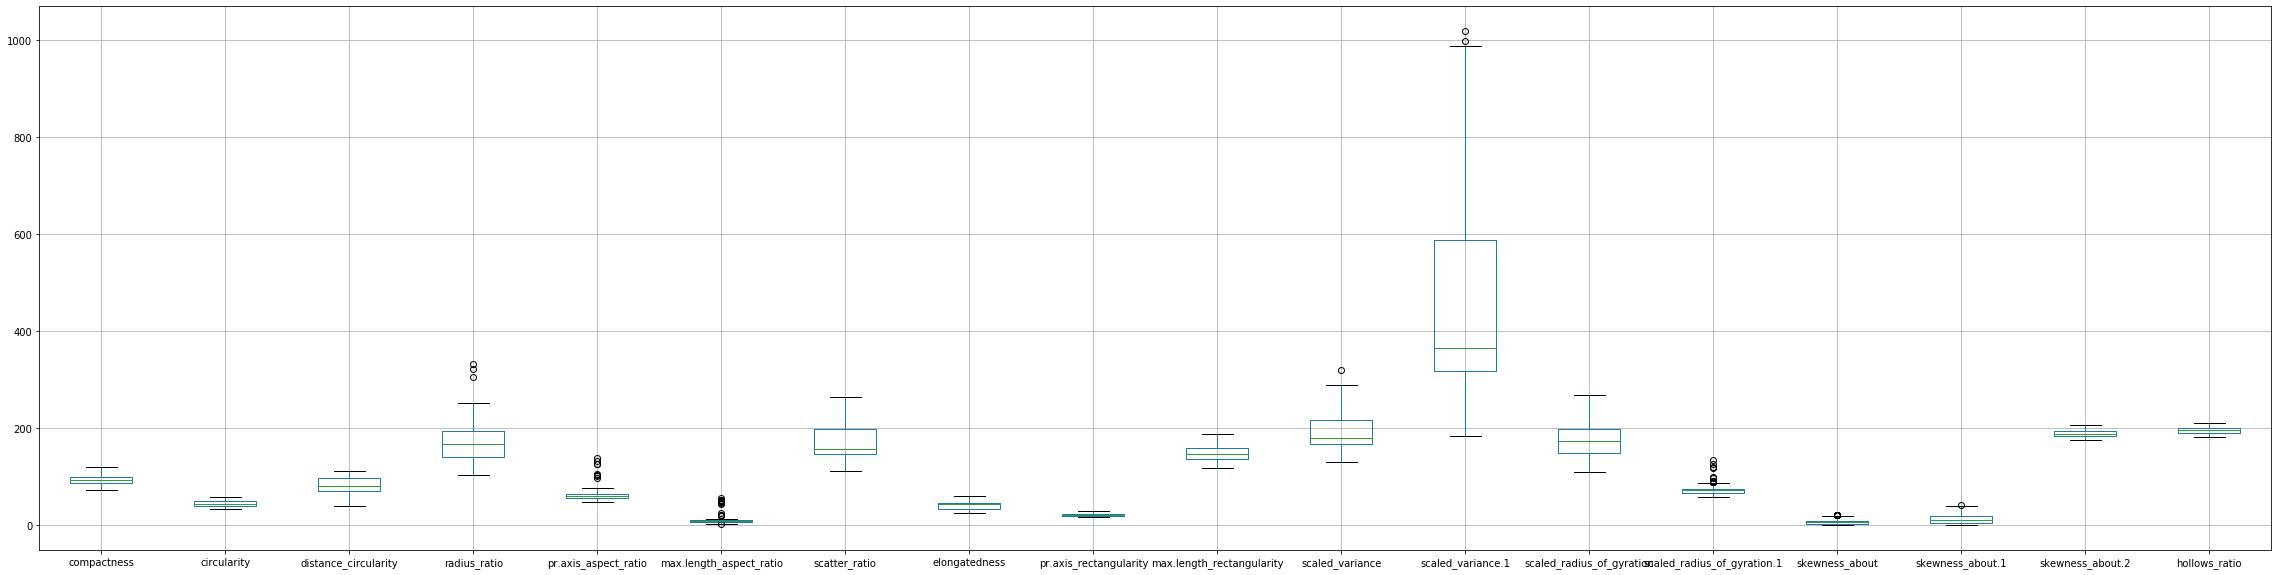

In [197]:
numeric_raw_Data.boxplot(figsize=(40,10))

In [206]:
for col_name in list(numeric_raw_Data.columns):
    numeric_raw_Data[col_name].loc[numeric_raw_Data[col_name]<describe_df.loc['cap_value_min',col_name]] = describe_df.loc['cap_value_min',col_name]
    numeric_raw_Data[col_name].loc[numeric_raw_Data[col_name]>describe_df.loc['cap_value_max',col_name]] = describe_df.loc['cap_value_max',col_name]


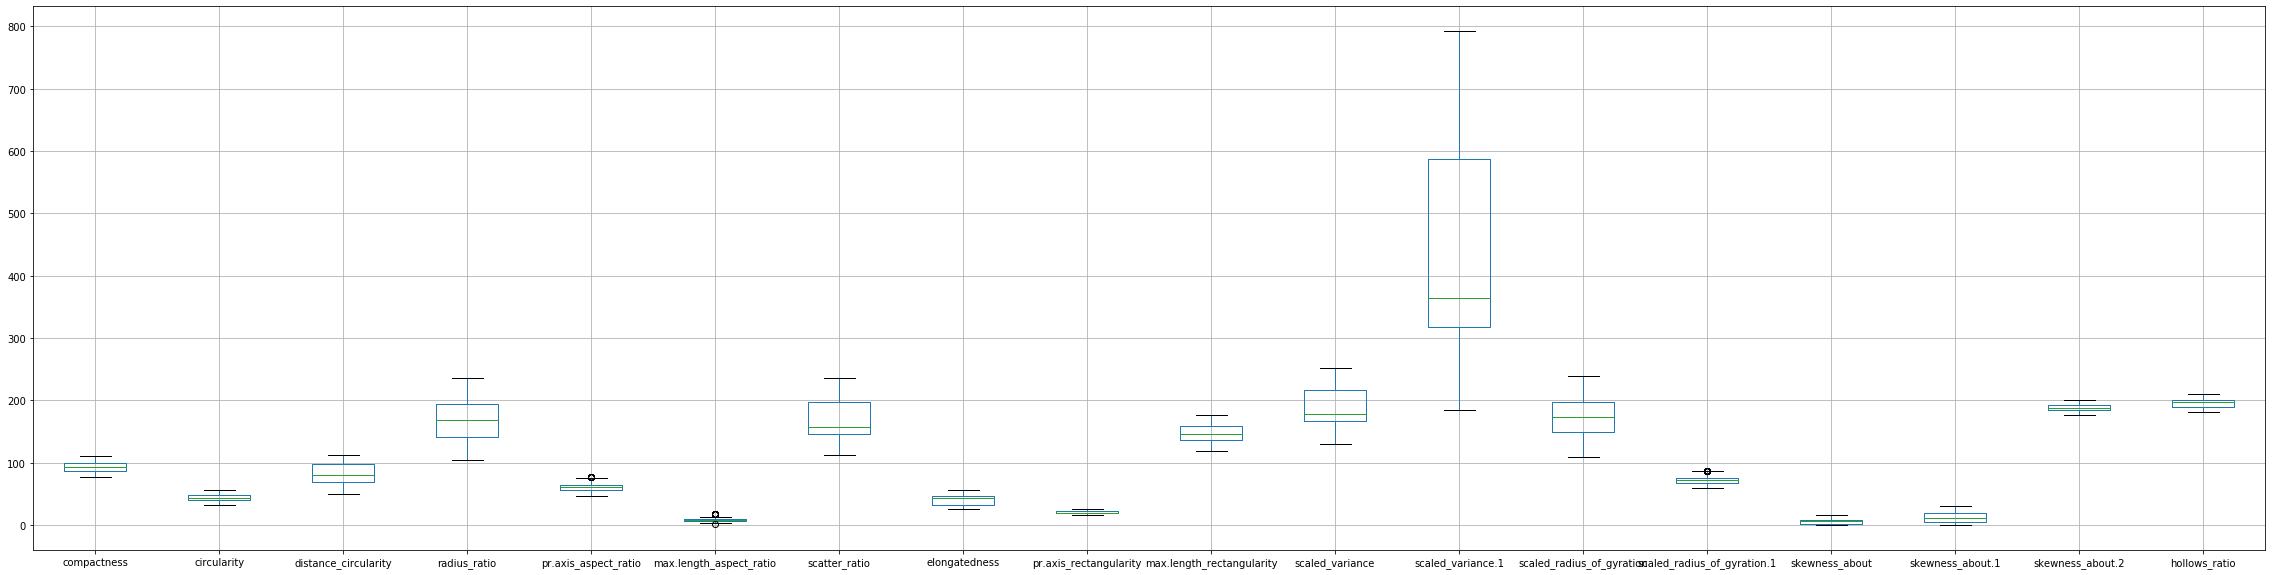

In [207]:
numeric_raw_Data.boxplot(figsize=(40,10))

In [209]:
data_fixed = numeric_raw_Data.copy()
data_fixed['class'] = data['class']

<h1>Bivariate Analysis</h1>

<h2>1. Pairplot Analysis</h2>

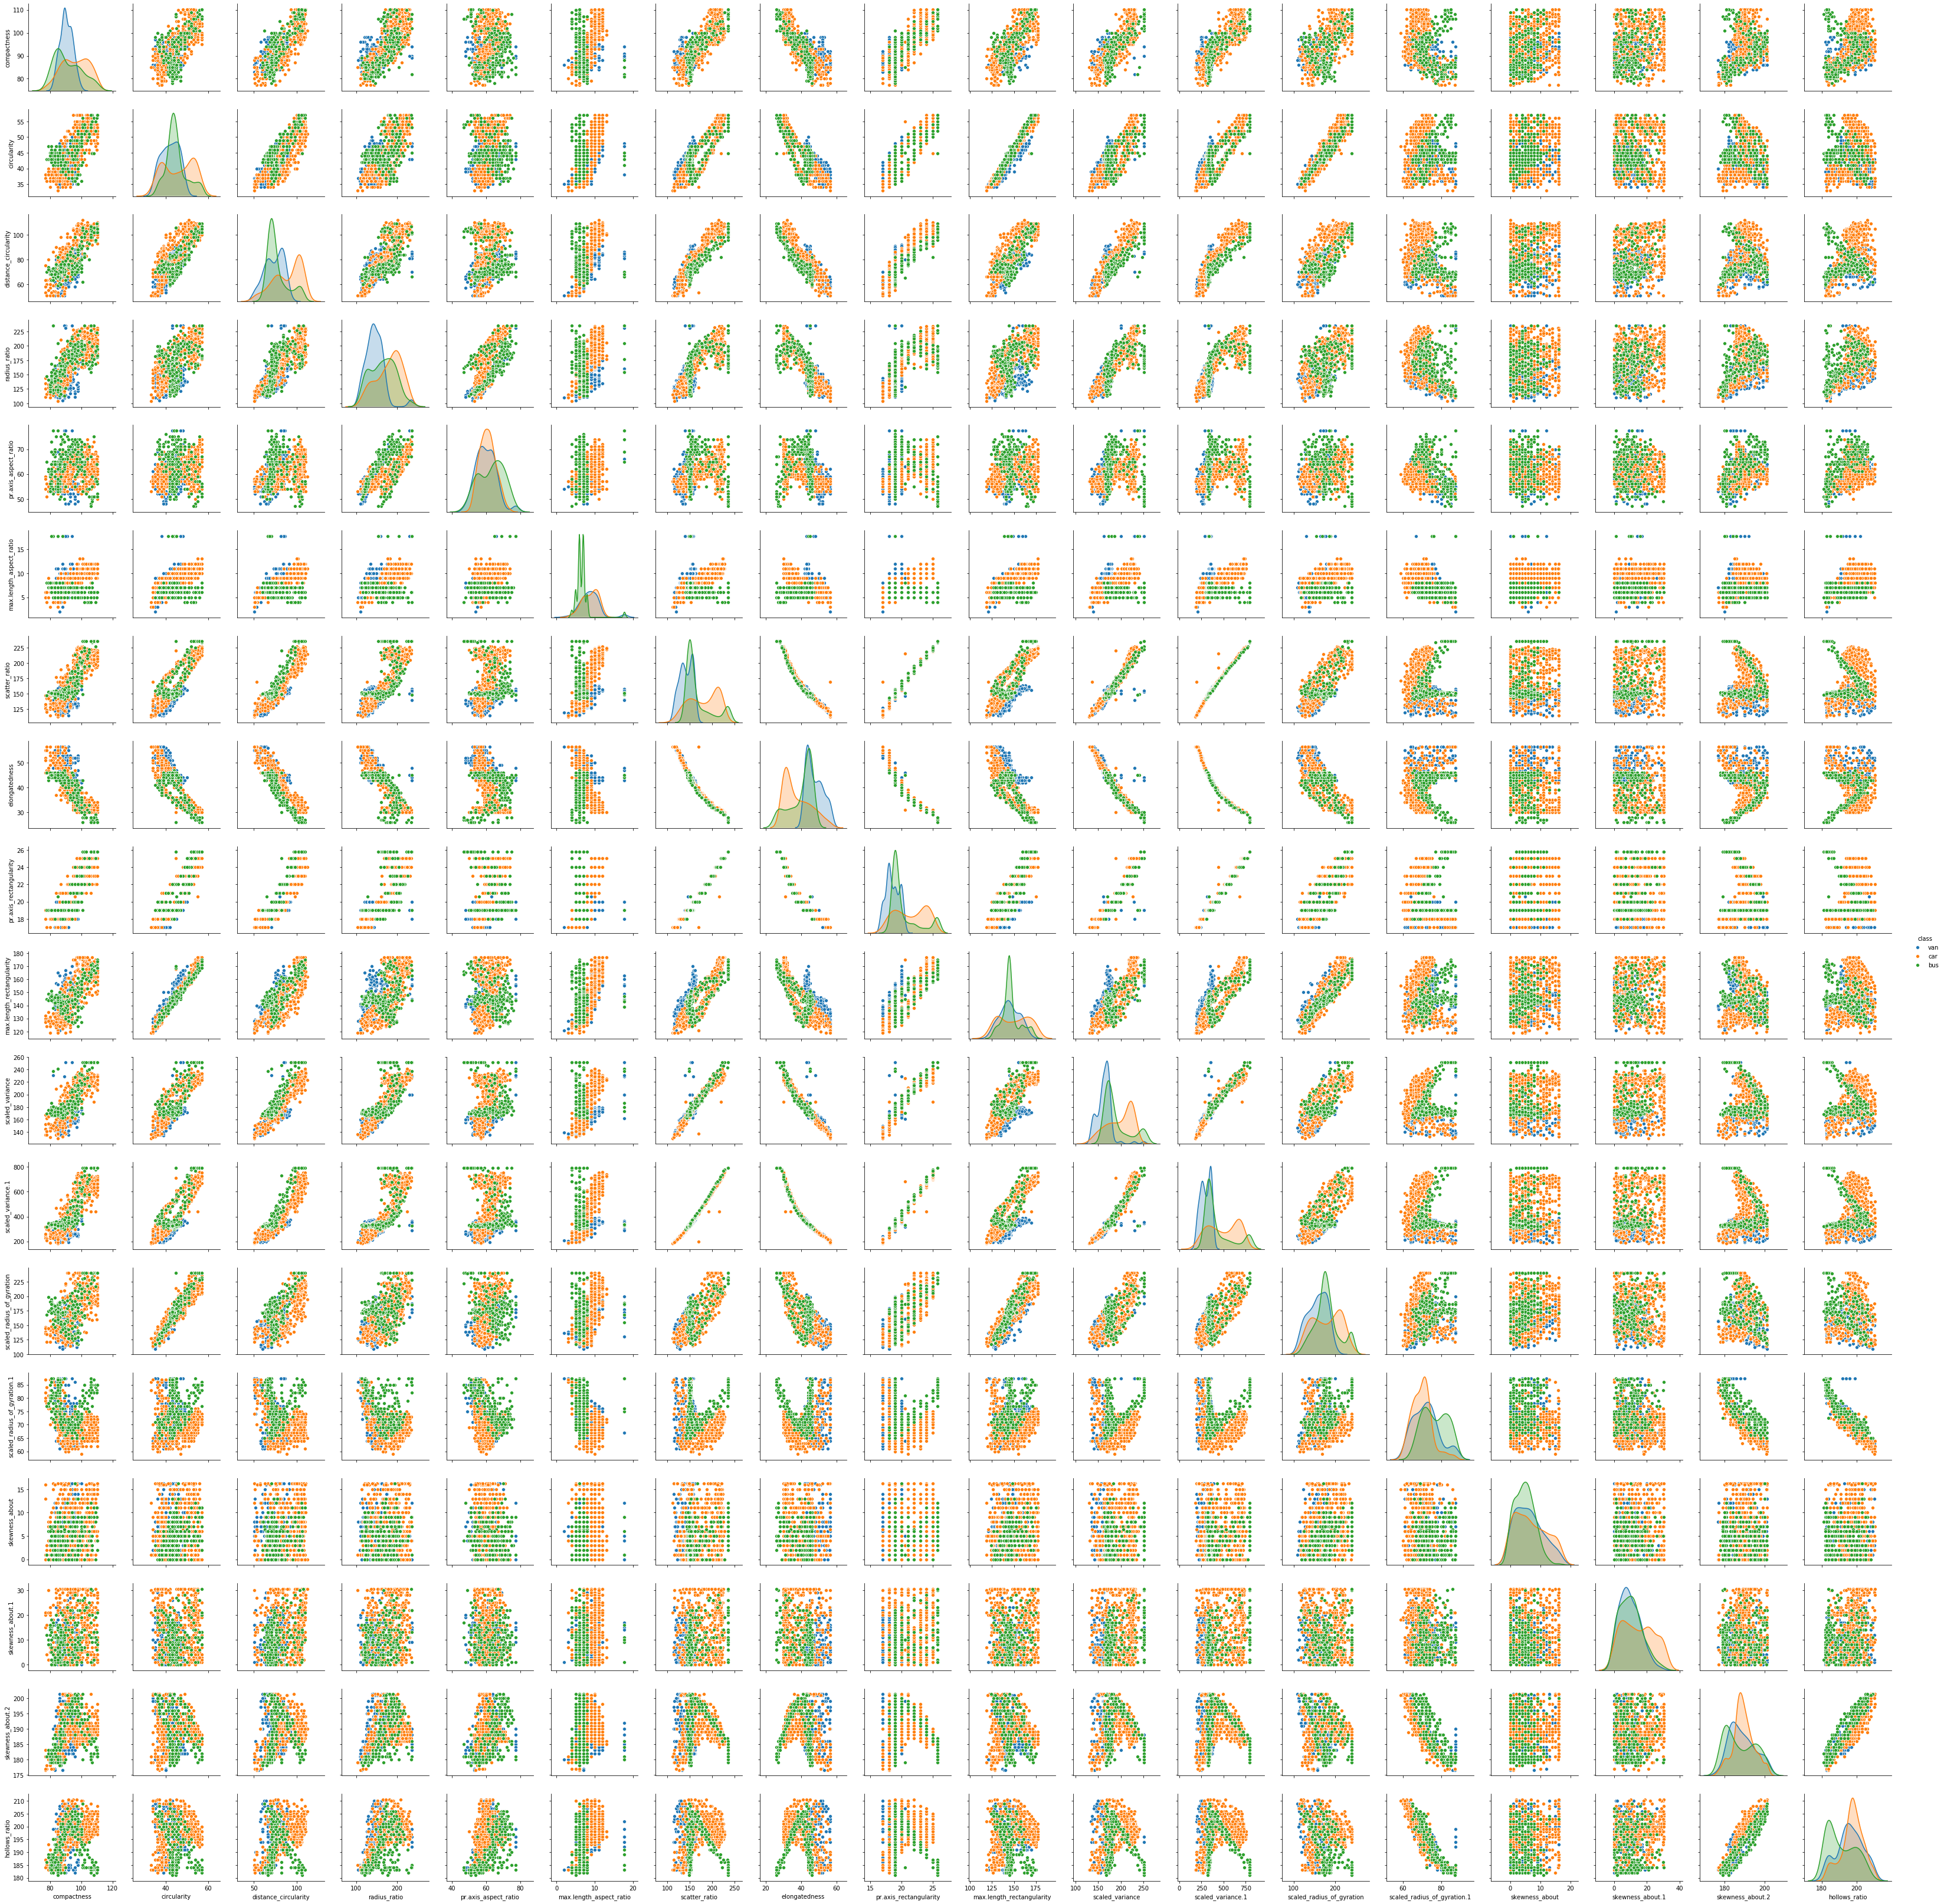

In [210]:
sns.pairplot(data_fixed, hue='class', diag_kind='kde')

<h2>2. correlation matrix</h2>

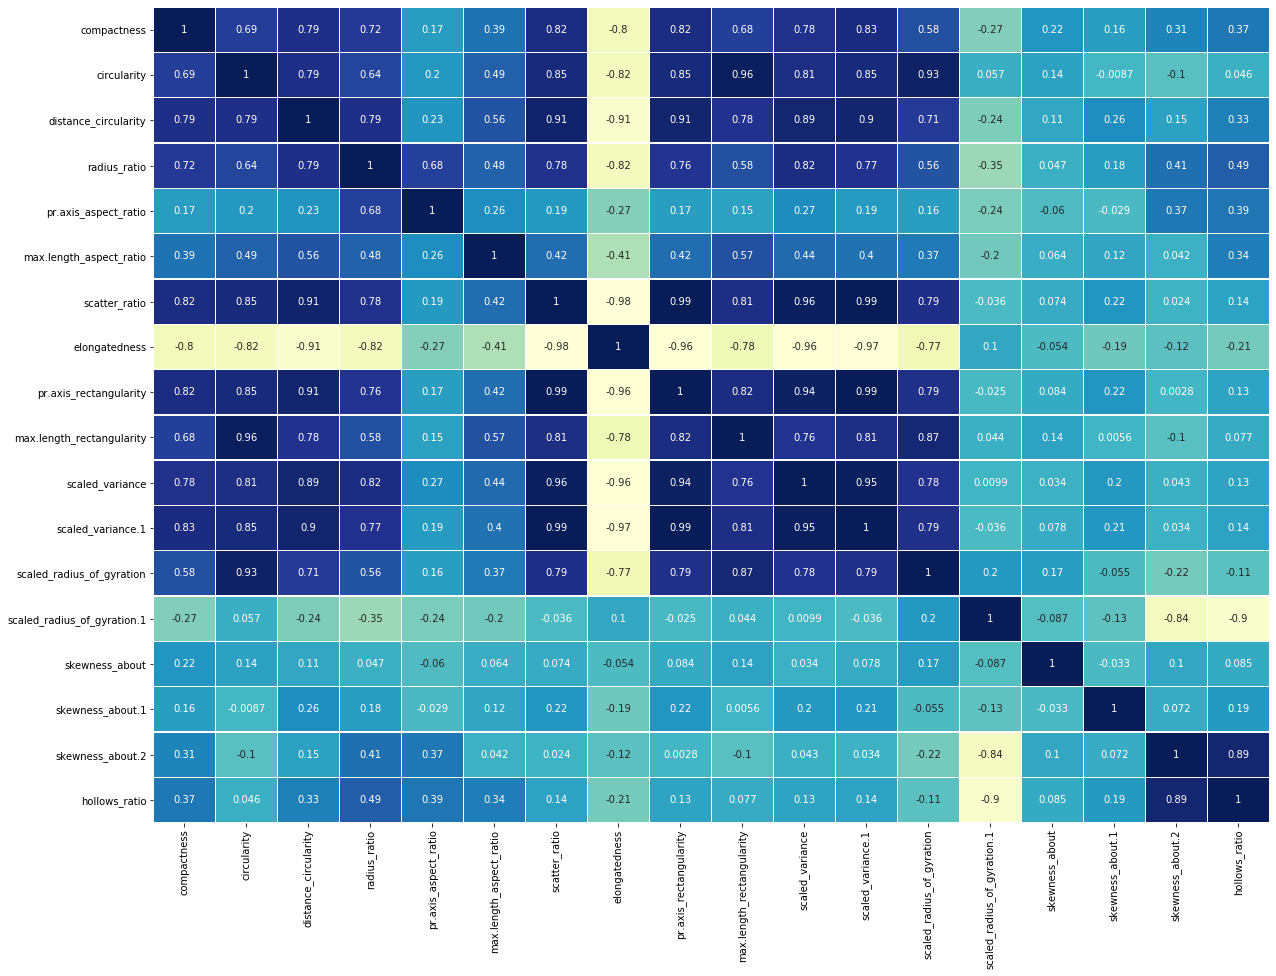

In [212]:
plt.figure(figsize=(20,15))
sns.heatmap(numeric_raw_Data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [215]:
numeric_raw_Data.corr()[(numeric_raw_Data.corr()>0.5)|(numeric_raw_Data.corr()<-0.5)]

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.688520              0.794965   
circularity                     0.688520     1.000000              0.793316   
distance_circularity            0.794965     0.793316              1.000000   
radius_ratio                    0.721898     0.638677              0.793467   
pr.axis_aspect_ratio                 NaN          NaN                   NaN   
max.length_aspect_ratio              NaN          NaN              0.558122   
scatter_ratio                   0.817853     0.852317              0.913382   
elongatedness                  -0.795623    -0.822832             -0.911159   
pr.axis_rectangularity          0.821400     0.851821              0.905730   
max.length_rectangularity       0.682781     0.962513              0.775429   
scaled_variance                 0.777830     0.812511              0.886148   
scaled_variance.1               0.825663     0.847869              0.904652   
scaled_radius_of_gyration       0.583144     0.933846              0.708363   
scaled_radius_of_gyration.1          NaN          NaN                   NaN   
skewness_about                       NaN          NaN                   NaN   
skewness_about.1                     NaN          NaN                   NaN   
skewness_about.2                     NaN          NaN                   NaN   
hollows_ratio                        NaN          NaN                   NaN   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.721898                   NaN   
circularity                      0.638677                   NaN   
distance_circularity             0.793467                   NaN   
radius_ratio                     1.000000              0.675184   
pr.axis_aspect_ratio             0.675184              1.000000   
max.length_aspect_ratio               NaN                   NaN   
scatter_ratio                    0.777526                   NaN   
elongatedness                   -0.821564                   NaN   
pr.axis_rectangularity           0.756305                   NaN   
max.length_rectangularity        0.582944                   NaN   
scaled_variance                  0.819795                   NaN   
scaled_variance.1                0.774152                   NaN   
scaled_radius_of_gyration        0.555933                   NaN   
scaled_radius_of_gyration.1           NaN                   NaN   
skewness_about                        NaN                   NaN   
skewness_about.1                      NaN                   NaN   
skewness_about.2                      NaN                   NaN   
hollows_ratio                         NaN                   NaN   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                      NaN       0.817853   
circularity                                      NaN       0.852317   
distance_circularity                        0.558122       0.913382   
radius_ratio                                     NaN       0.777526   
pr.axis_aspect_ratio                             NaN            NaN   
max.length_aspect_ratio                     1.000000            NaN   
scatter_ratio                                    NaN       1.000000   
elongatedness                                    NaN      -0.977525   
pr.axis_rectangularity                           NaN       0.989115   
max.length_rectangularity                   0.567571       0.813235   
scaled_variance                                  NaN       0.958007   
scaled_variance.1                                NaN       0.994708   
scaled_radius_of_gyration                        NaN       0.792143   
scaled_radius_of_gyration.1                      NaN            NaN   
skewness_about                                   NaN            NaN   
skewness_about.1                                 NaN            NaN   
skewness_about.2                              

Many of the variables seems to be correlated amongst each other. In order to reduce the number of dimensions, we will check the variation explaied by each of these variables

<h1>PCA_Sklearn</h1>

In [220]:
numericScaled = numeric_raw_Data.apply(zscore)

In [221]:
numericScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.171246     0.519893              0.054409      0.293965   
1    -0.324982    -0.624953              0.118326     -0.853930   
2     1.287761     0.846992              1.524494      1.255715   
3    -0.076868    -0.624953             -0.009508     -0.295494   
4    -1.069326    -0.134305             -0.776508      1.131619   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.834115                 0.739403      -0.201960   
1             -0.739947                 0.316962      -0.604664   
2              0.804490                 0.739403       1.192013   
3              0.289678                 0.316962      -0.759549   
4              2.768182                 4.021692      -0.604664   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.141578               -0.218377                   0.767859   
1       0.529042               -0.619160                  -0.344044   
2      -1.149970                0.983972                   0.698365   
3       0.658197               -0.619160                  -0.344044   
4       0.529042               -0.619160                  -0.274550   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.403919          -0.340123                   0.302831   
1        -0.606997          -0.631780                  -0.515653   
2         1.186855           1.183631                   1.436116   
3        -0.945459          -0.756775                  -1.491537   
4         1.796088          -0.661540                   0.428752   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.343975       -0.055546          0.416968   
1                    -0.035474        0.591678          0.182664   
2                     0.118776        1.670383         -0.403096   
3                    -1.423728       -0.055546         -0.285944   
4                     2.337615        0.591678         -0.168792   

   skewness_about.2  hollows_ratio  
0         -0.311018       0.184386  
1          0.018544       0.453576  
2         -0.146237       0.049791  
3          1.666353       1.530338  
4         -1.464485      -1.699947

In [234]:
pca = PCA()
pca.fit(numericScaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<h3>Explained Variance</h3>

In [235]:
print(pca.explained_variance_)

[9.75851430e+00 3.26034971e+00 1.19319350e+00 1.15831177e+00
 8.62770354e-01 7.46817682e-01 3.59741163e-01 2.25359843e-01
 1.35946259e-01 9.20141153e-02 6.66454412e-02 5.07503447e-02
 3.56348354e-02 2.55140557e-02 1.88865947e-02 1.79085937e-02
 9.68896183e-03 3.25426170e-03]


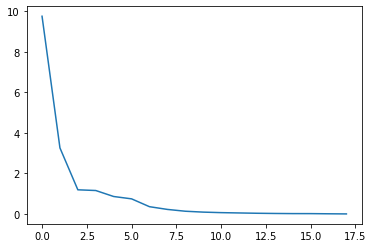

In [330]:
plt.plot(pca.explained_variance_)

<h3>EigenVectors</h3>

In [236]:
print(pca.components_)

[[-2.72329517e-01 -2.87107385e-01 -3.01985039e-01 -2.72510599e-01
  -9.98130710e-02 -1.73971051e-01 -3.10724345e-01  3.08680810e-01
  -3.08375670e-01 -2.77897147e-01 -3.04060671e-01 -3.09268071e-01
  -2.62598157e-01  4.59674213e-02 -3.99175036e-02 -5.90744134e-02
  -4.12950183e-02 -8.72105441e-02]
 [-8.73743237e-02  1.42113706e-01 -4.03787096e-02 -1.93597336e-01
  -2.40525239e-01 -7.93986319e-02  6.67579665e-02 -1.77822345e-02
   7.63553718e-02  1.32399189e-01  6.00174883e-02  6.54099251e-02
   2.14652587e-01  5.00688397e-01 -2.85354109e-02 -9.44386384e-02
  -5.13180742e-01 -5.12871755e-01]
 [ 5.99631752e-02 -1.90766728e-01  1.07472877e-01 -7.76245342e-02
  -3.64393997e-01 -1.57903913e-01  1.19767153e-01 -8.26780538e-02
   1.24712453e-01 -1.82771101e-01  9.20392827e-02  1.19559020e-01
  -2.14866422e-01 -8.66831094e-03 -2.60970540e-01  7.58578170e-01
  -4.36853126e-02 -1.08800119e-02]
 [-2.00923642e-01 -4.94604496e-02 -4.46344926e-02  2.40359454e-01
   5.32747094e-01  4.83207885e-02  1.

<h3>EigenValues</h3>

In [237]:
print(pca.explained_variance_ratio_)

[5.41498856e-01 1.80916437e-01 6.62101725e-02 6.42745891e-02
 4.78750295e-02 4.14408288e-02 1.99619965e-02 1.25051922e-02
 7.54364255e-03 5.10585287e-03 3.69814801e-03 2.81613089e-03
 1.97737299e-03 1.41577207e-03 1.04801500e-03 9.93745839e-04
 5.37639398e-04 1.80578614e-04]


<h3>Individual Variation Explained vs Cumilative Variation Explained</h3>

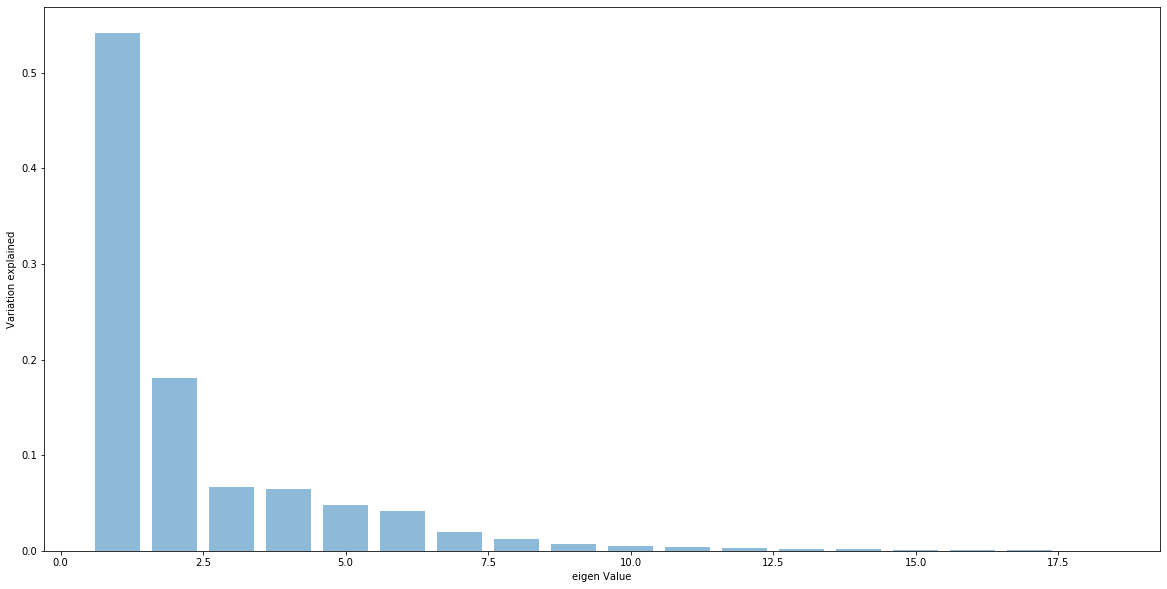

In [244]:
plt.figure(figsize=(20 , 10))
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

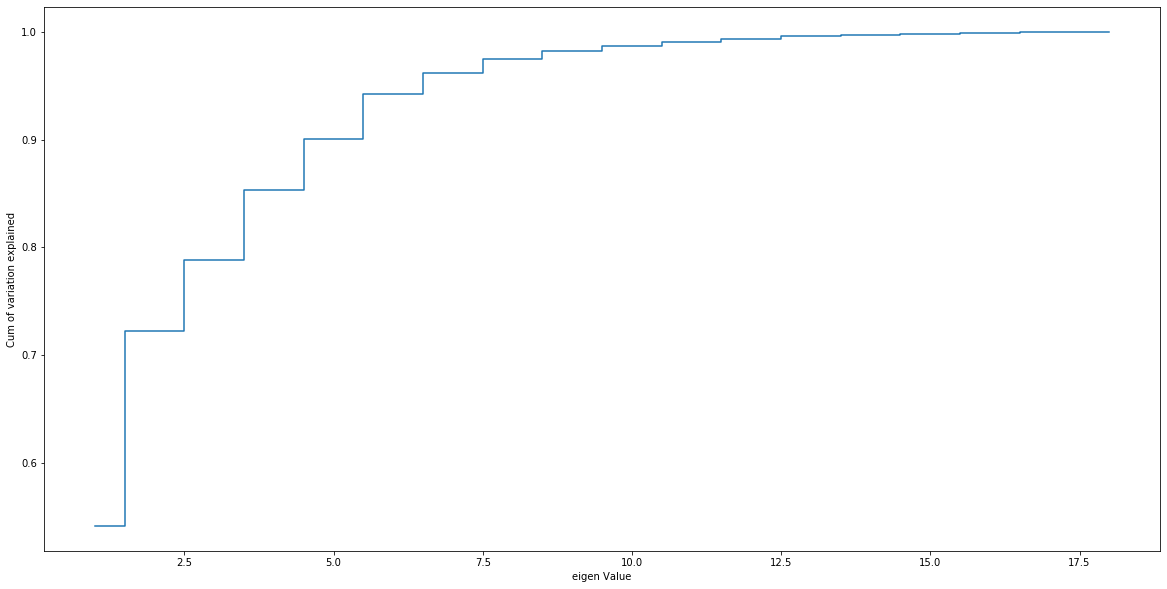

In [245]:
plt.figure(figsize=(20 , 10))
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

<h1>Dimensionality Reduction - 12 dimensions seems to be reasonable</h1>

In [343]:
pca12 = PCA(n_components=12)
pca12.fit(numericScaled)
print(pca12.components_)
print(pca12.explained_variance_ratio_)
Xpca12 = pca12.transform(numericScaled)

[[-2.72329517e-01 -2.87107385e-01 -3.01985039e-01 -2.72510599e-01
  -9.98130710e-02 -1.73971051e-01 -3.10724345e-01  3.08680810e-01
  -3.08375670e-01 -2.77897147e-01 -3.04060671e-01 -3.09268071e-01
  -2.62598157e-01  4.59674213e-02 -3.99175036e-02 -5.90744134e-02
  -4.12950183e-02 -8.72105441e-02]
 [-8.73743237e-02  1.42113706e-01 -4.03787096e-02 -1.93597336e-01
  -2.40525239e-01 -7.93986319e-02  6.67579665e-02 -1.77822345e-02
   7.63553718e-02  1.32399189e-01  6.00174883e-02  6.54099251e-02
   2.14652587e-01  5.00688397e-01 -2.85354109e-02 -9.44386384e-02
  -5.13180742e-01 -5.12871755e-01]
 [ 5.99631752e-02 -1.90766728e-01  1.07472877e-01 -7.76245342e-02
  -3.64393997e-01 -1.57903913e-01  1.19767153e-01 -8.26780538e-02
   1.24712453e-01 -1.82771101e-01  9.20392827e-02  1.19559020e-01
  -2.14866422e-01 -8.66831094e-03 -2.60970540e-01  7.58578170e-01
  -4.36853126e-02 -1.08800119e-02]
 [-2.00923642e-01 -4.94604496e-02 -4.46344926e-02  2.40359454e-01
   5.32747094e-01  4.83207885e-02  1.

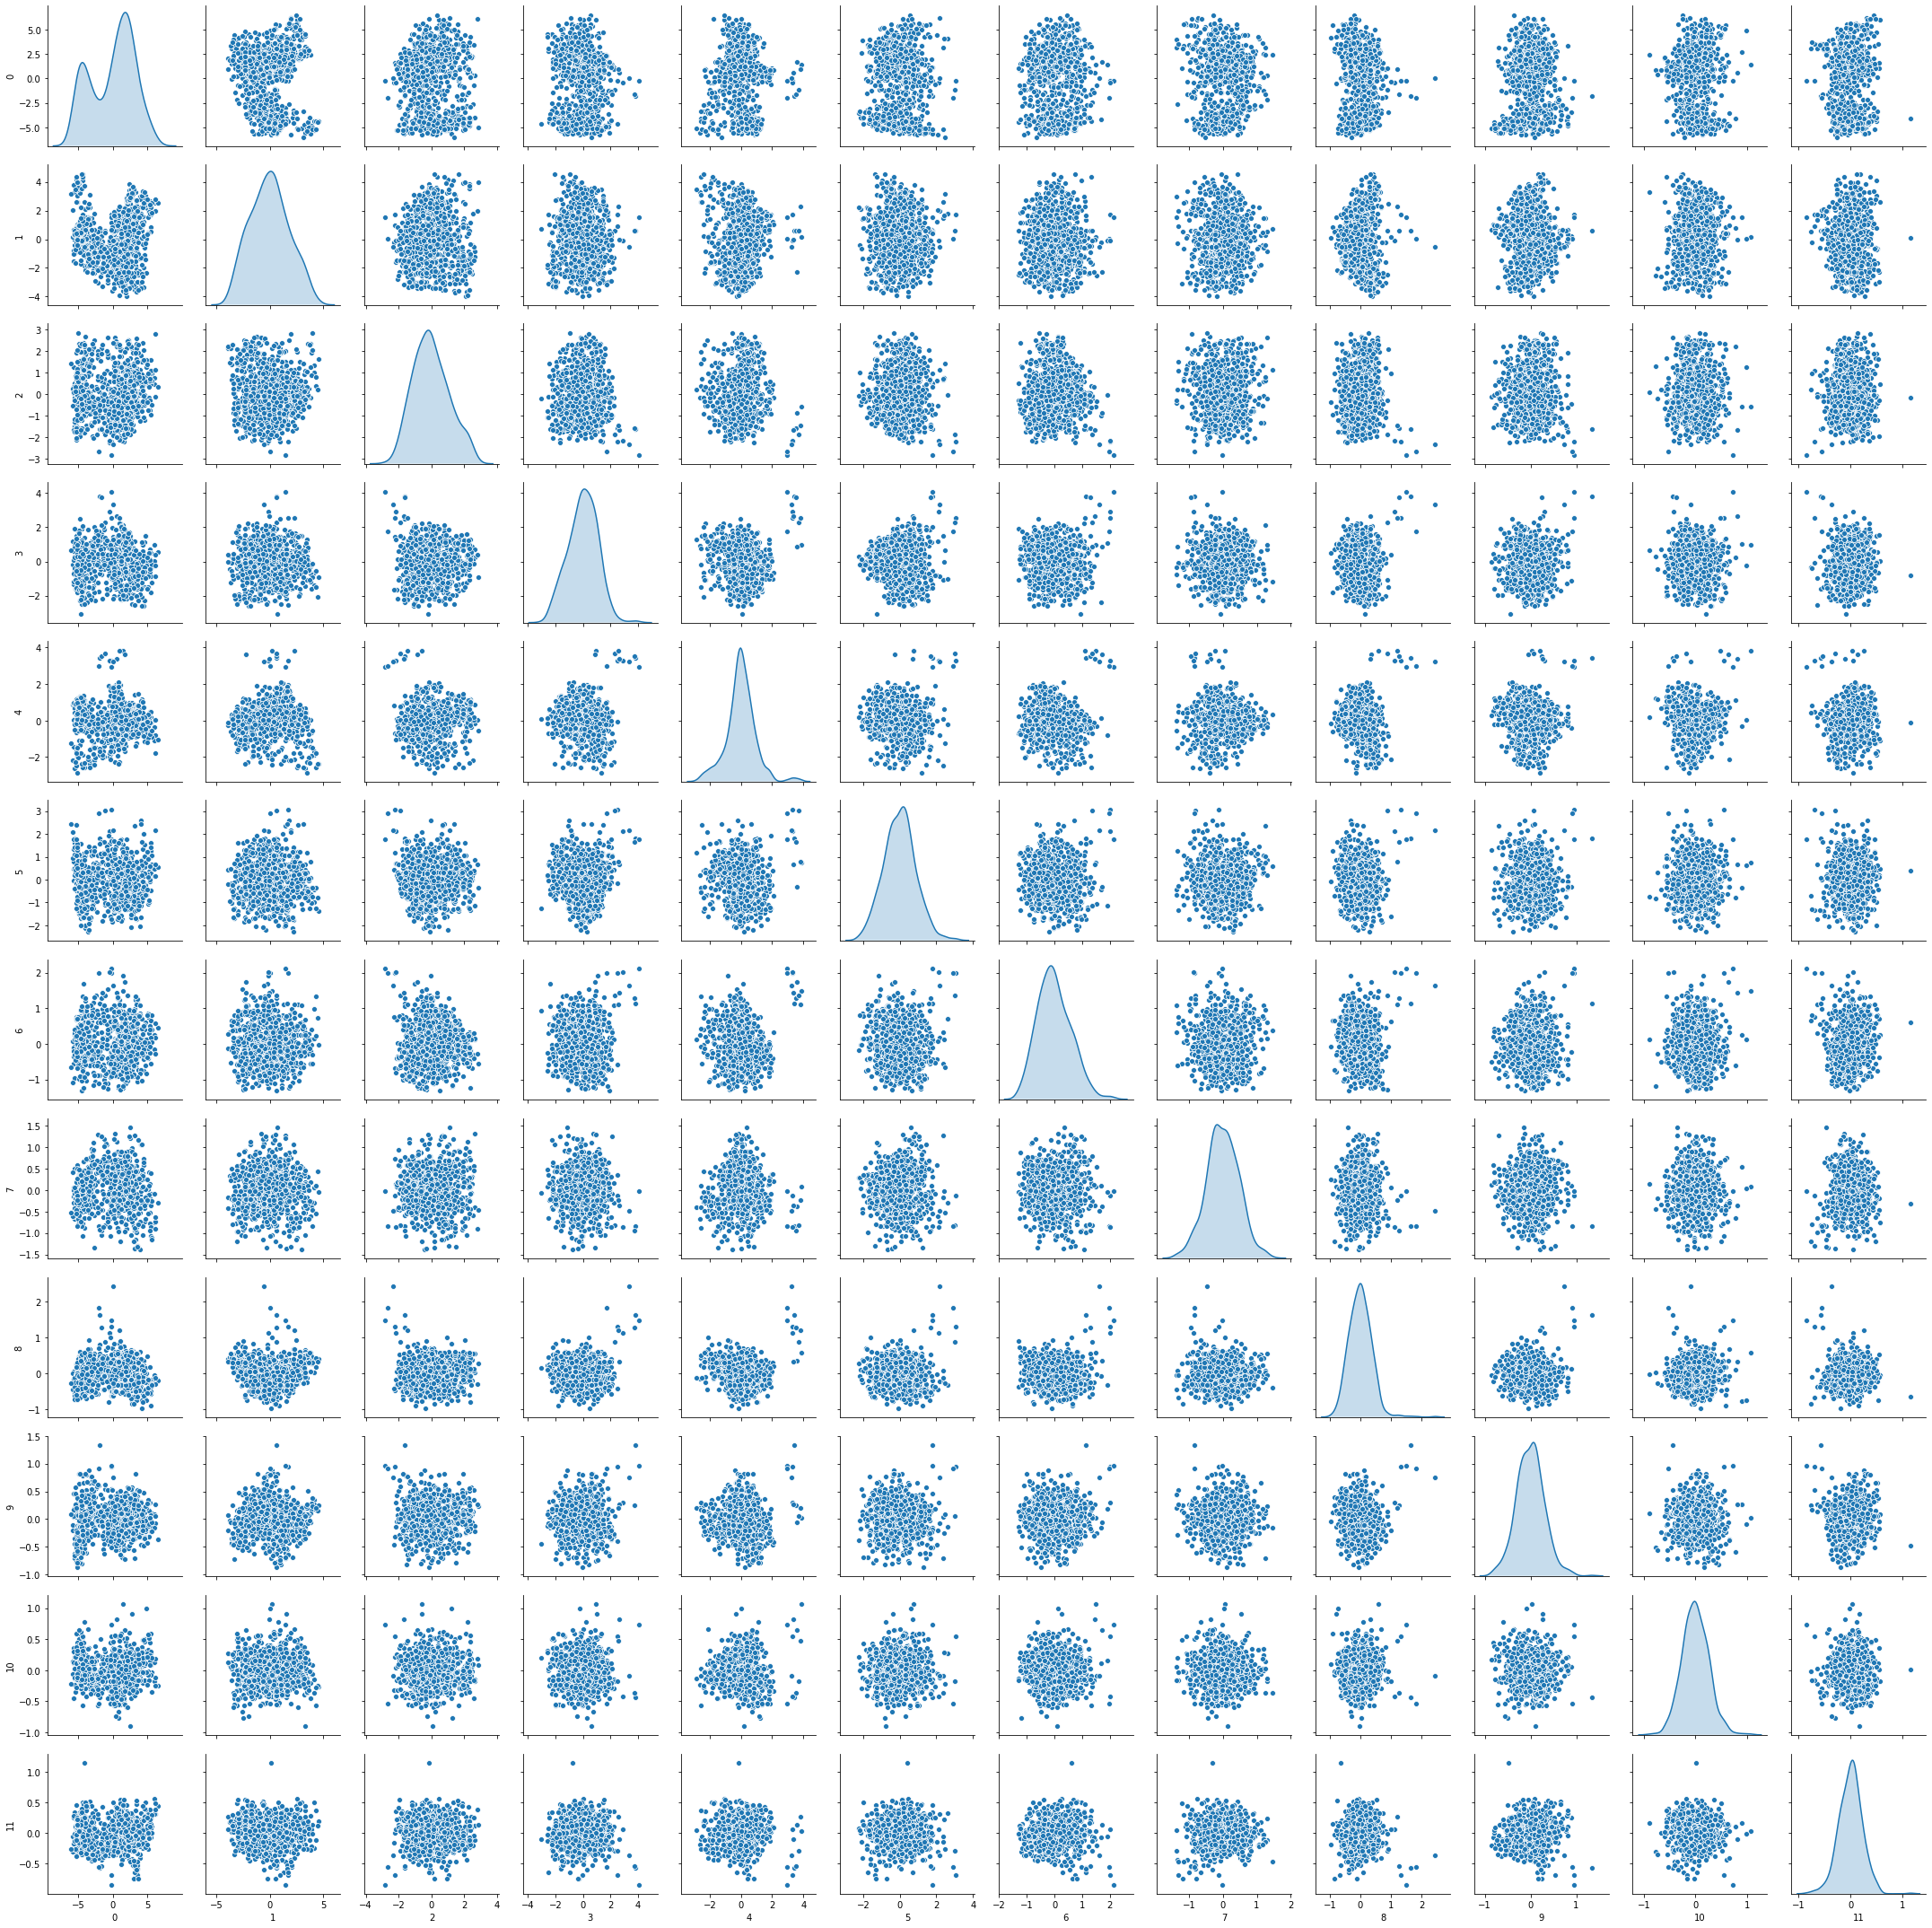

In [344]:
sns.pairplot(pd.DataFrame(Xpca12), diag_kind='kde')

<h1>Model Building with SVM</h1>

<h2>With PCA</h2>

In [345]:
X_train, X_test, y_train, y_test = train_test_split(Xpca12, y, test_size = 0.3, random_state = 1)

In [346]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(592, 12)
(254, 12)
(592,)
(254,)


In [347]:
SVM_classifier = SVC()

In [348]:
SVM_classifier.fit(X_train,y_train)

C:\Users\ssriva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [349]:
print("Training Accuracy: \n", SVM_classifier.score(X_train,y_train))
print("Test Accuracy: \n", SVM_classifier.score(X_test,y_test))

Training Accuracy: 
 0.9797297297297297
Test Accuracy: 
 0.937007874015748


In [350]:
y_pred = SVM_classifier.predict(X_test)

In [351]:
confusion_matrix(y_test,y_pred)

array([[ 58,   1,   0],
       [  2, 126,   5],
       [  6,   2,  54]], dtype=int64)

In [352]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bus       0.88      0.98      0.93        59
         car       0.98      0.95      0.96       133
         van       0.92      0.87      0.89        62

    accuracy                           0.94       254
   macro avg       0.92      0.93      0.93       254
weighted avg       0.94      0.94      0.94       254



<h2>Without PCA</h2>

In [322]:
X_train, X_test, y_train, y_test = train_test_split(numericScaled, y, test_size = 0.3, random_state = 0)

In [323]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(592, 18)
(254, 18)
(592,)
(254,)


In [324]:
SVM_classifier = SVC()

In [325]:
SVM_classifier.fit(X_train,y_train)

C:\Users\ssriva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [326]:
print("Training Accuracy: \n", SVM_classifier.score(X_train,y_train))
print("Test Accuracy: \n", SVM_classifier.score(X_test,y_test))

Training Accuracy: 
 0.9763513513513513
Test Accuracy: 
 0.9803149606299213


In [327]:
y_pred = SVM_classifier.predict(X_test)

In [328]:
confusion_matrix(y_test,y_pred)

array([[ 58,   1,   1],
       [  1, 139,   1],
       [  1,   0,  52]], dtype=int64)

In [329]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bus       0.97      0.97      0.97        60
         car       0.99      0.99      0.99       141
         van       0.96      0.98      0.97        53

    accuracy                           0.98       254
   macro avg       0.97      0.98      0.98       254
weighted avg       0.98      0.98      0.98       254



<h1>Observations</h1>
<ul>
    <li>Many of the variables seems to be correlated amongst each other.</li>
    <li> In order to reduce the number of dimensions, upon checking the variation explaied by each of these variables, it was found that 12 components(at the max) explain all of the variations.</li>
    <li>The model built without using PCA has a better accuracy score than the one built with wing PCA</li>
</ul>